In [33]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from scipy import stats, spatial
import csv

In [34]:
tfidf_path = '../../data/tfidf_merged_chs_1000/'

In [35]:
lda_path = '../../data/lda_merged_chs/'

In [36]:
fandom_list = [i for i in os.listdir(lda_path) if 'tsv' in i]

In [37]:
fandom_list

['buffy_the_vampire_slayer_temporal_lda_jsd_toprev_with_dist_merged_chs.tsv',
 'ms_paint_adventures_temporal_lda_jsd_toprev_with_dist_merged_chs.tsv',
 'marvel_temporal_lda_jsd_toprev_with_dist_merged_chs.tsv',
 'supernatural_temporal_lda_jsd_toprev_with_dist_merged_chs.tsv',
 'harry_potter_temporal_lda_jsd_toprev_with_dist_merged_chs.tsv',
 'attack_on_titan_temporal_lda_jsd_toprev_with_dist_merged_chs.tsv',
 'kuroko_no_basuke_temporal_lda_jsd_toprev_with_dist_merged_chs.tsv',
 'tolkien_j_r_r_works_&_related_fandoms_temporal_lda_jsd_toprev_with_dist_merged_chs.tsv',
 'one_direction_temporal_lda_jsd_toprev_with_dist_merged_chs.tsv',
 'the_walking_dead_&_related_fandoms_temporal_lda_jsd_toprev_with_dist_merged_chs.tsv',
 'haikyuu_temporal_lda_jsd_toprev_with_dist_merged_chs.tsv',
 'doctor_who_&_related_fandoms_temporal_lda_jsd_toprev_with_dist_merged_chs.tsv',
 'hamilton_miranda_temporal_lda_jsd_toprev_with_dist_merged_chs.tsv',
 'hetalia_axis_powers_temporal_lda_jsd_toprev_with_dist_mer

### Topic entropy

In [46]:
def calc_ent(field):
    try:
        return stats.entropy(eval(field))
    except:
        return float('nan')

In [49]:
df_all = []
for i,fandom in enumerate(fandom_list):
    df = pd.read_csv(os.path.join(lda_path,fandom), sep = '\t', quoting=csv.QUOTE_NONE)
    df['Entropy'] = df.apply(lambda row: calc_ent(row['Dist']), axis=1)
    
    df_all.append(df)
df = pd.concat(df_all)

In [50]:
df.head()

,index,AdditionalTags,ArchiveWarnings,Author,Bookmarks,Category,Chapters,Characters,Fandoms,Hits,...,Words,Text,PublishDate,UpdateDate,CompleteDate,Comments,URL,Dist,JSD,Entropy
0,321,"Alternate Ending, Romance, Fluff, Community: i...",No Archive Warnings Apply,angelus2hot,0.0,F/M,1,"Angel, Buffy Summers",['Buffy the Vampire Slayer'],245.0,...,2312.0,\nAngel and Spike leaned against the desk disc...,2009-07-10,NaN,2009-07-10,0.0,http://archiveofourown.org/works/156263,"[2.2184724e-05, 0.017603794, 2.2184724e-05, 2....",0.410143,0.931672
1,528,"Alternate Universe - Fantasy, Angst, Horror","Graphic Depictions Of Violence, Major Characte...",PaganBaby,3.0,F/M,13,"Spike, Buffy - Character, Willow, Xander, Darl...",['Buffy the Vampire Slayer'],493.0,...,38902.0,"""\nSpike walked slowly through his bedroom. He...",2009-07-09,NaN,2009-07-09,0.0,http://archiveofourown.org/works/522562/chapte...,"[1.3316399e-06, 0.099384494, 0.004671756, 0.03...",0.132142,1.440110
2,1821,"Cheating, Bloodplay, Painplay, Dominant Masochism",No Archive Warnings Apply,jedusaur,0.0,F/M,1,"Angel (BtVS), Faith Lehane",['Buffy the Vampire Slayer'],329.0,...,1399.0,"""\nBefore Faith came to Sunnydale, vampires we...",2009-07-28,NaN,2009-07-28,0.0,http://archiveofourown.org/works/232972?view_a...,"[3.71539e-05, 3.71539e-05, 3.71539e-05, 3.7153...",0.461693,0.204859
3,2110,"Community: remixredux09, POV Female Character",Rape/Non-Con,Erinya,0.0,Gen,1,"Anya Jenkins, Rupert Giles",['Buffy the Vampire Slayer'],275.0,...,2903.0,"""\nIt was late. The Magic Box was dark and emp...",2009-07-26,NaN,2009-07-26,0.0,http://archiveofourown.org/works/315450,"[1.8193401e-05, 1.8193401e-05, 1.8193401e-05, ...",0.181952,1.845654
4,2548,"Crossover, Crossover Pairing, Award Winners, P...",No Archive Warnings Apply,Jedi Buttercup,4.0,F/M,1,"Buffy Summers, James T. Kirk, Spock Prime","['Buffy the Vampire Slayer', 'Star Trek (2009)']",1793.0,...,1400.0,"""\nKirk slowed as he approached Ambassador Spo...",2009-07-15,NaN,2009-07-15,9.0,http://archiveofourown.org/works/41755,"[3.988294e-05, 3.988294e-05, 0.2248358, 0.2028...",0.178154,1.522140


In [55]:
df = df.dropna(subset=['Entropy'])

In [58]:
term_n = sorted(df['Entropy'].tolist())
term_n = np.quantile(term_n, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
term_n = np.insert(term_n, 0, 0)
# term_n = np.concatenate([term_n, [1]])

In [59]:
term_n

array([0.        , 0.75717741, 1.14318787, 1.42349806, 1.66061098,
       1.87832424, 2.08844365, 2.30733354, 2.54222371, 2.82453535])

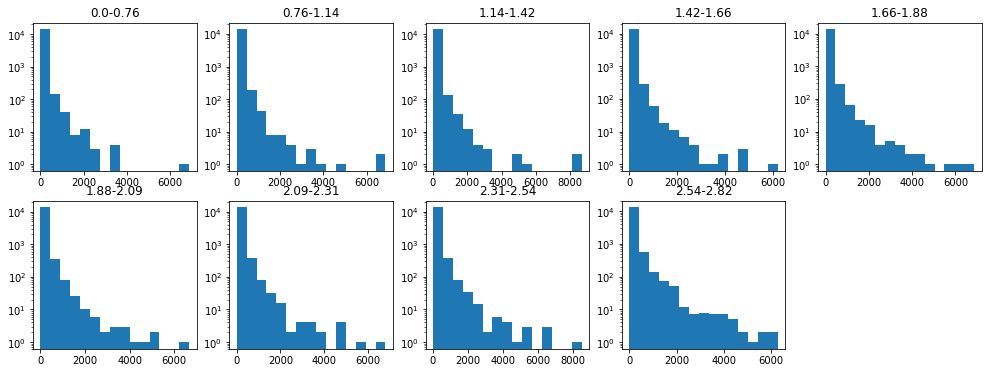

In [60]:
fig = plt.figure(figsize=(17, 6))
for i in range(len(term_n)-1):
    df_s = df[(df['Entropy'] >= term_n[i]) & (df['Entropy'] < term_n[i+1])]
    fig.add_subplot(2,5,i+1)
    plt.hist(df_s['Kudos'], bins=15)
    plt.yscale('log')
    plt.title(str(round(term_n[i], 2)) + '-' + str(round(term_n[i+1], 2)))

Text(0.5, 1.0, 'Entropy distribution')

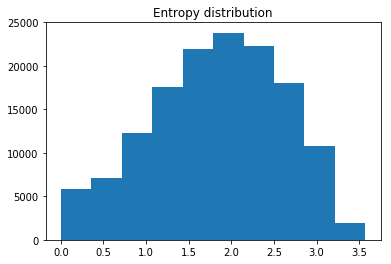

In [69]:
plt.hist(df.Entropy)
plt.title('Entropy distribution')

Text(0, 0.5, 'Log of Kudos')

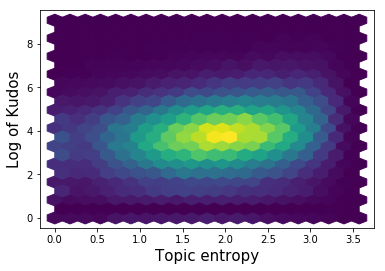

In [77]:
plt.hexbin(df['Entropy'], np.log(df['Kudos']),gridsize=20)
# plt.yscale('log')
plt.xlabel('Topic entropy', fontsize=15)
plt.ylabel('Log of Kudos', fontsize=15)